In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sb  
sb.set_style('darkgrid')

In [4]:
daily_data = pd.read_csv('../exchangeratedata/daily_rates.csv', skiprows=3, header=0)
monthly_data = pd.read_csv('../exchangeratedata/monthly_rates.csv', skiprows=11, header=0)
daily_data.head()

,DATE,XUDLERS,XUDLUSS
0,04 Jan 2000,1.5874,1.6352
1,05 Jan 2000,1.5862,1.6390
2,06 Jan 2000,1.5921,1.6478
3,07 Jan 2000,1.5909,1.6372
4,10 Jan 2000,1.5956,1.6377


In [5]:
daily_data['datetime'] = pd.to_datetime(daily_data['DATE'])
daily_data['dayofweek'] = daily_data['datetime'].apply(lambda row: row.dayofweek)
weekly_data = daily_data[daily_data['dayofweek'] == 4]

In [6]:
print weekly_data.head(5)

           DATE  XUDLERS  XUDLUSS   datetime  dayofweek
3   07 Jan 2000   1.5909   1.6372 2000-01-07          4
8   14 Jan 2000   1.6152   1.6349 2000-01-14          4
13  21 Jan 2000   1.6391   1.6506 2000-01-21          4
18  28 Jan 2000   1.6529   1.6198 2000-01-28          4
23  04 Feb 2000   1.6214   1.5886 2000-02-04          4


In [7]:
UK_US = pd.DataFrame()
UK_US['UK_US']=weekly_data['XUDLUSS']
# UK_US['LIBOR']=weekly_data['IUDSOIA']
# UK_US['forward_UK_US_1mo']=weekly_data['XUDLDS1']
UK_US['datetime']=weekly_data['datetime']
UK_US = UK_US.reset_index(drop=True)

UK_EU = pd.DataFrame()
UK_EU['UK_EU']=weekly_data['XUDLERS']
# UK_EU['LIBOR']=weekly_data['IUDSOIA']
# UK_EU['forward_UK_US_1mo']=weekly_data['XUDLDS1']
UK_EU['datetime']=weekly_data['datetime']
UK_EU = UK_EU.reset_index(drop=True)



In [19]:
full = pd.DataFrame()
full['UK_US']=weekly_data['XUDLUSS']
# full['LIBOR']=weekly_data['IUDSOIA']
# full['forward_UK_US_1mo']=weekly_data['XUDLDS1']
full['datetime']=weekly_data['datetime']
full['UK_EU']=weekly_data['XUDLERS']
full = full.reset_index(drop=True)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


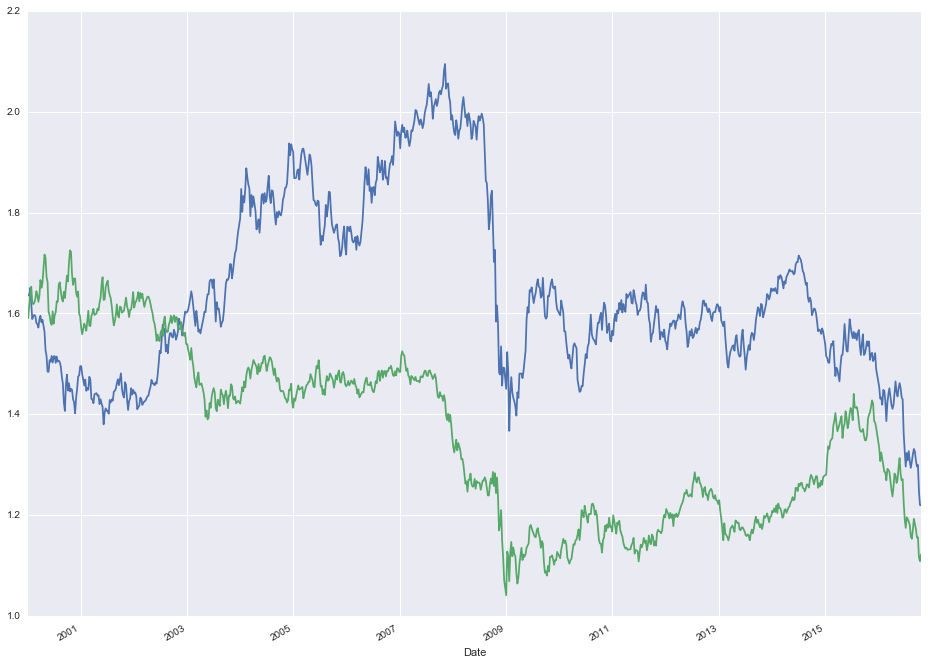

In [20]:
full['Date'] = full['datetime'].convert_objects(convert_dates='coerce')  
full = full.sort_index(by='Date')  
full = full.set_index('Date')  
full['UK_US'].plot(figsize=(16, 12))  
full['UK_EU'].plot(figsize=(16, 12)) 





In [ ]:
full['LIBOR'].plot(figsize=(16, 12)) 

In [ ]:
full['forward_UK_US_1mo'].plot(figsize=(16, 12)) 
full['UK_US'].plot(figsize=(16, 12)) 
full[['UK_US', 'forward_UK_US_1mo']].iloc[100:160, :].plot(figsize=(16, 12))  
full[['UK_US', 'forward_UK_US_1mo']].iloc[800:860, :].plot(figsize=(16, 12))  


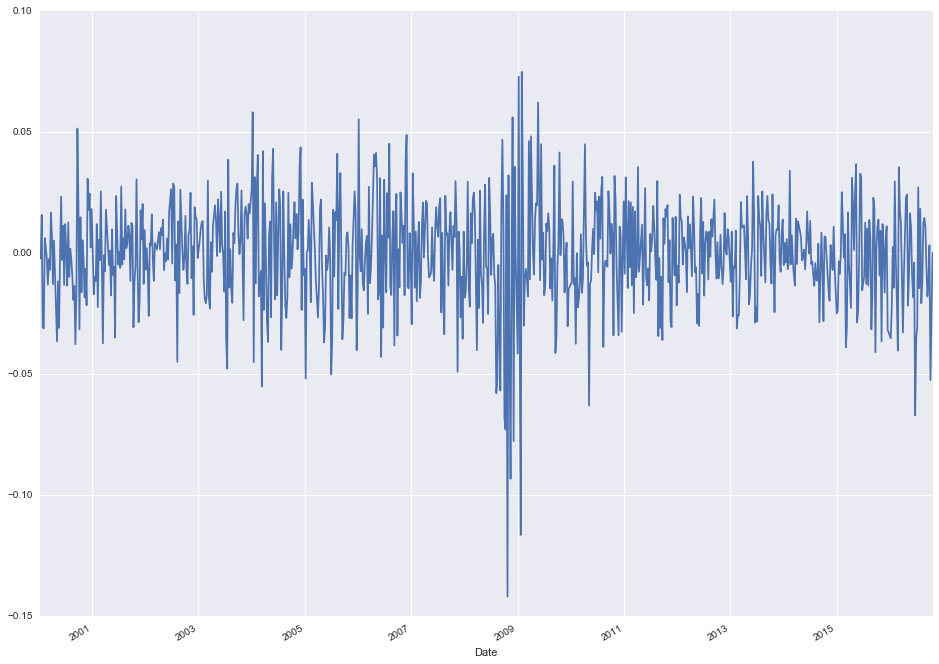

In [21]:
full['first_diff_uk_us'] = full['UK_US'] - full['UK_US'].shift()  
full['first_diff_uk_us'].plot(figsize=(16, 12))  

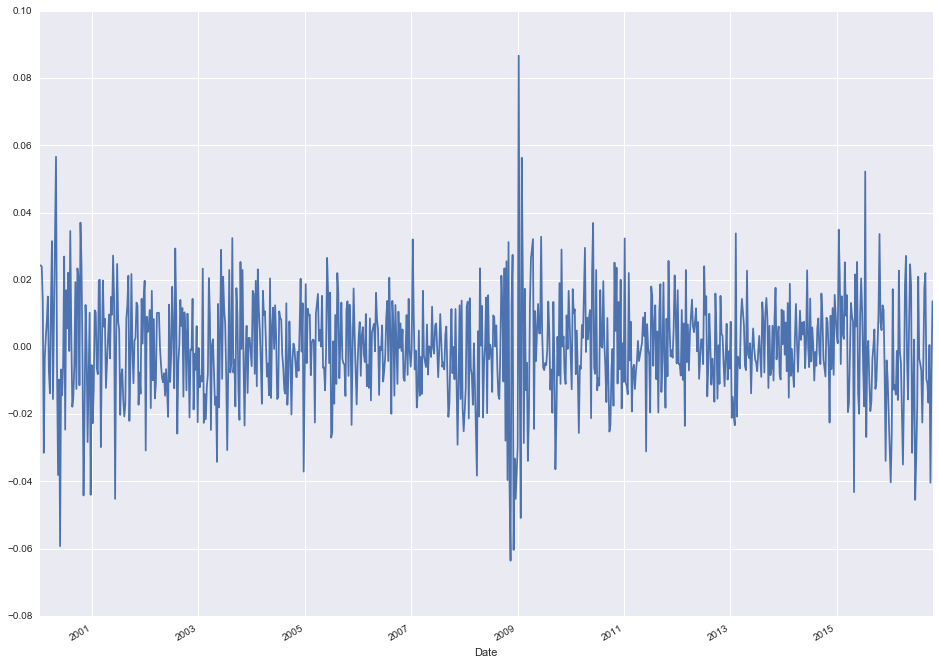

In [22]:
full['first_diff_uk_eu'] = full['UK_EU'] - full['UK_EU'].shift()  
full['first_diff_uk_eu'].plot(figsize=(16, 12))   

In [ ]:
full['first_diff_libor'] = full['LIBOR'] - full['LIBOR'].shift()  
full['first_diff_libor'].plot(figsize=(16, 12))   

In [ ]:
full['var_uk_us'] = pd.rolling_var(full['UK_US'], 4, min_periods=None, freq=None, center=True)  
full['var_uk_eu'] = pd.rolling_var(full['UK_EU'], 4, min_periods=None, freq=None, center=True)  
full['var_libor'] = pd.rolling_var(full['LIBOR'], 4, min_periods=None, freq=None, center=True) 

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(13, 12))  
full['var_uk_us'].plot(ax=ax[0], title='UK/US exchange rate rolling variance')  
full['var_uk_eu'].plot(ax=ax[1], title='UK/EU exchange rate rolling variance')  
full['var_libor'].plot(ax=ax[2], title='Overnight LIBOR rolling variance')  
fig.tight_layout()  

In [ ]:
full['lag_1_uk_us'] = full['first_diff_uk_us'].shift()  
sb.jointplot('first_diff_uk_us', 'lag_1_uk_us', full, kind='reg', size=13) 


In [ ]:
full['lag_2_uk_us'] = full['first_diff_uk_us'].shift(2)  
sb.jointplot('first_diff_uk_us', 'lag_2_uk_us', full, kind='reg', size=13) 



In [ ]:
full['lag_4_uk_us'] = full['first_diff_uk_us'].shift(4)  
sb.jointplot('first_diff_uk_us', 'lag_4_uk_us', full, kind='reg', size=13) 



In [ ]:
lag_correlations_UK_US = acf(full['first_diff_uk_us'].iloc[1:])  
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations_UK_US, marker='o', linestyle='--')  

In [ ]:
decomposition_UK_US = seasonal_decompose(full['first_diff_uk_us'][1:], model='additive', freq=52)  
fig = plt.figure()  
fig = decomposition_UK_US.plot() 
#plt.plot(decomposition_UK_US.trend)
#trend = pd.DataFrame(decomposition_UK_US.trend)


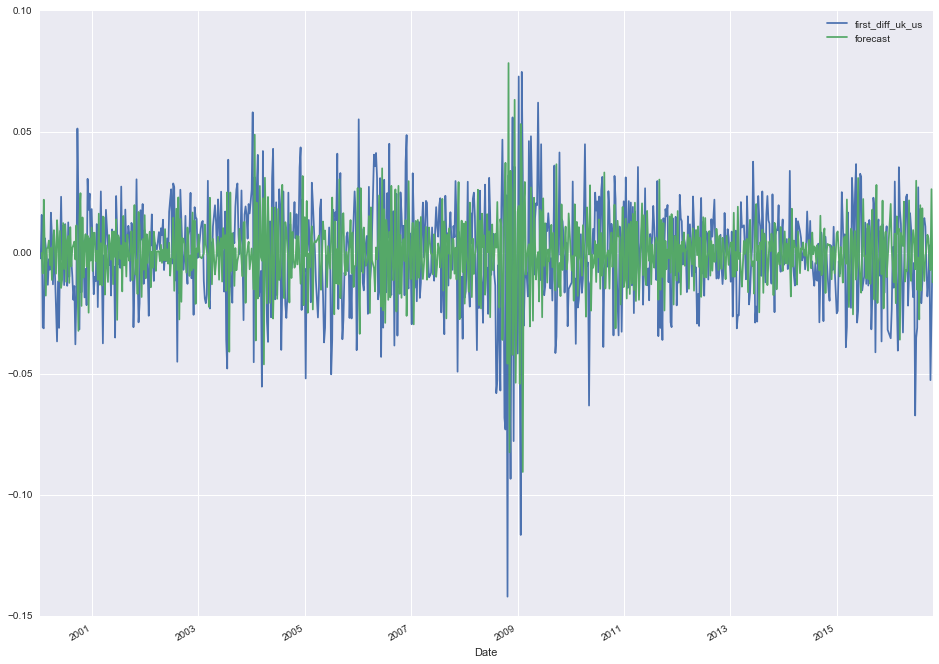

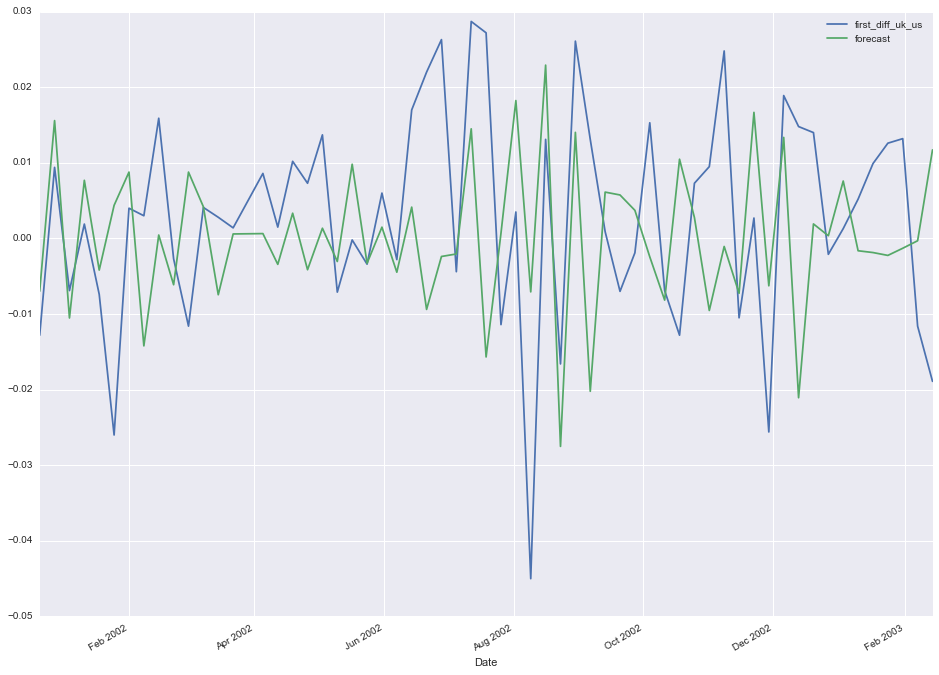

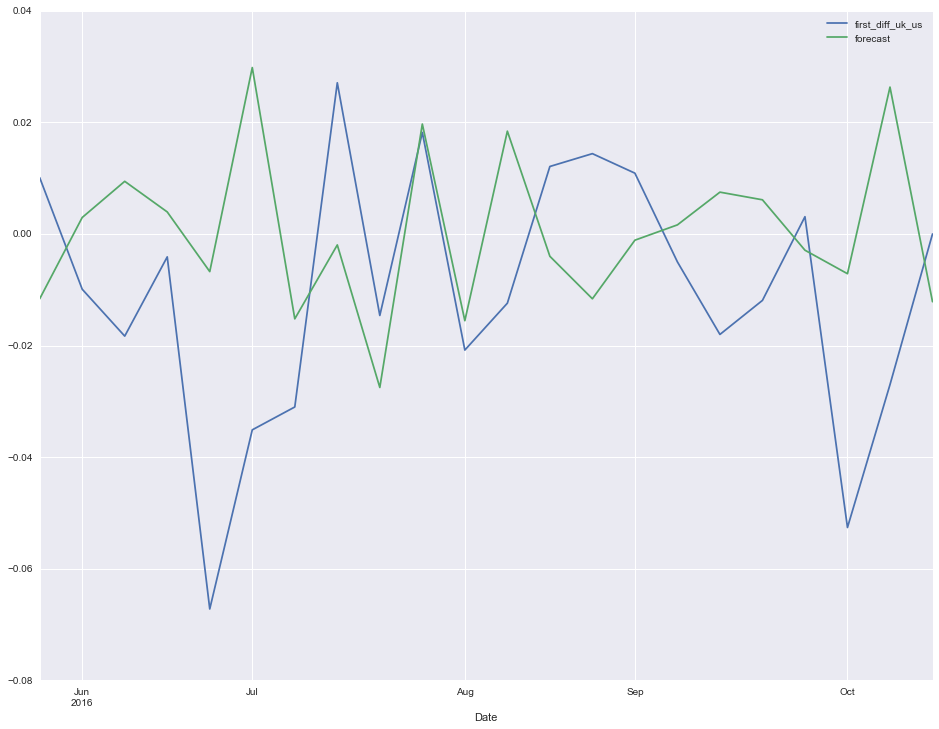

In [23]:
model_UK_US = sm.tsa.ARIMA(full['first_diff_uk_us'].iloc[1:], order=(1, 1, 0), dates=full['datetime'])  
results = model_UK_US.fit(disp=-1)  
full['forecast'] = results.fittedvalues  
full[['first_diff_uk_us', 'forecast']].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[100:160, :].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[830:860, :].plot(figsize=(16, 12))  

In [ ]:
model_UK_US = sm.tsa.ARIMA(full['first_diff_uk_us'].iloc[1:], order=(0, 2, 1), dates=full['datetime'])  
results = model_UK_US.fit(disp=-1)  
full['forecast'] = results.fittedvalues  
full[['first_diff_uk_us', 'forecast']].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[100:160, :].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[830:860, :].plot(figsize=(16, 12)) 

In [ ]:
print(results.params)

In [ ]:
model_UK_US = sm.tsa.ARIMA(full['first_diff_uk_us'].iloc[1:], order=(0, 2, 1), 
                           dates=full['datetime'], exog=(full['first_diff_libor'].iloc[1:]))  
results = model_UK_US.fit(disp=-1)  
full['forecast'] = results.fittedvalues  
full[['first_diff_uk_us', 'forecast']].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[100:160, :].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[830:860, :].plot(figsize=(16, 12))

In [ ]:
print(results.params)

In [24]:
def transform_back(results):
    predictions_diff = pd.Series(results.fittedvalues, copy=True)
    predictions_diff_cumsum = predictions_diff.cumsum()
    predictions_diff = pd.Series(UK_US['UK_US'].ix[1], index=UK_US['datetime'])
    predictions_diff = predictions_diff.add(predictions_diff_cumsum,fill_value=0)
    predictions_diff_exp = np.exp(predictions_diff)
    return predictions_diff_exp

In [26]:
predictions = transform_back(results)

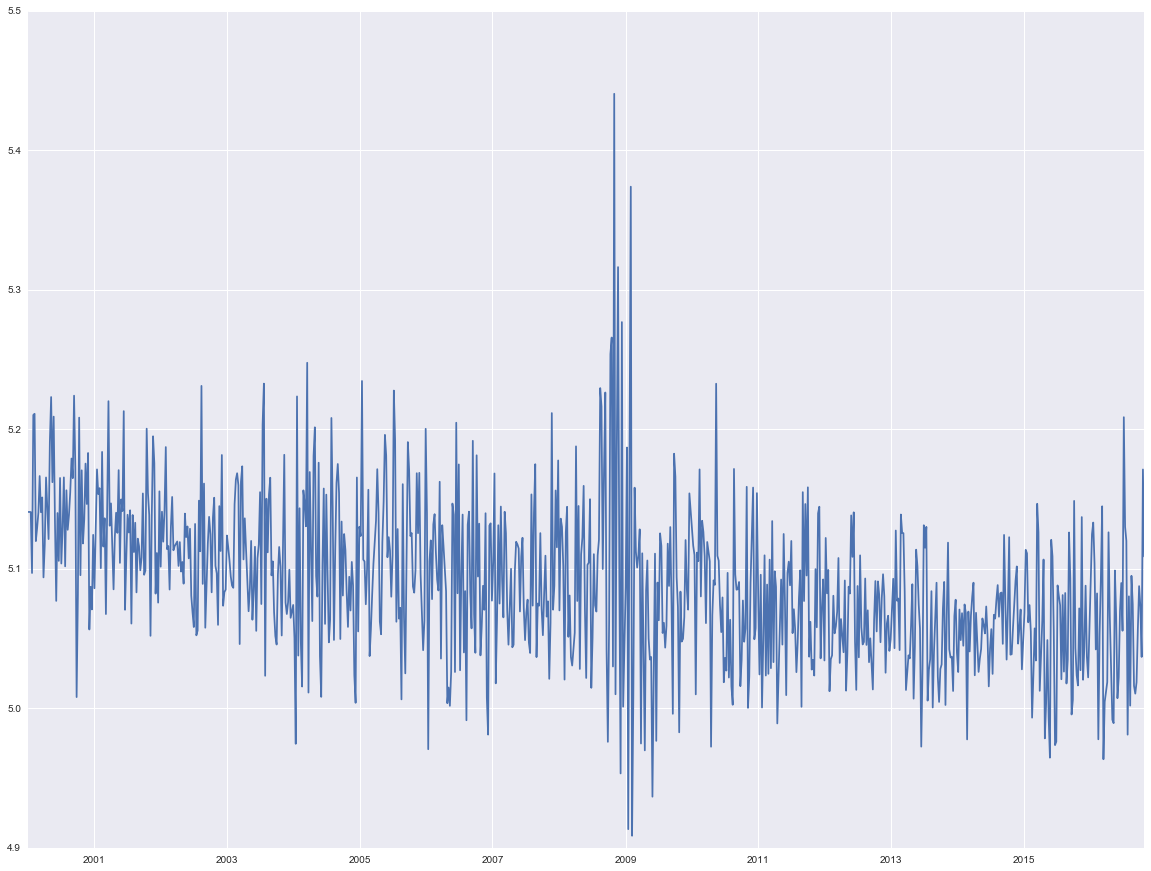

In [29]:
plt.figure(figsize=(20,15))
# plt.plot(UK_US['UK_US'][1:])
plt.plot(predictions)

In [ ]:
full['residuals_arma_0_2_1_libor']=full['first_diff_uk_us']-full['forecast']
#full['residuals_arma_0_2_1_libor'].plot(figsize=(16, 12))
full['residuals_arma_0_2_1_libor'].hist(figsize=(16, 12), bins=50)
#full['first_diff_uk_us'].plot(figsize=(16, 12))

In [18]:
from sklearn.metrics import r2_score as r2
r2_naive = pd.DataFrame()
r2_naive['firstlag']=UK_US['UK_US'].shift()
r2_naive['ts']=UK_US['UK_US']
r2_naive = r2_naive.iloc[1:]

r2_naive.head(100)

,firstlag,ts
1,1.6372,1.6349
2,1.6349,1.6506
3,1.6506,1.6198
4,1.6198,1.5886
5,1.5886,1.5947
6,1.5947,1.5969
7,1.5969,1.5945
8,1.5945,1.5813
9,1.5813,1.5787
10,1.5787,1.5717


In [19]:
print r2(r2_naive['ts'], r2_naive['firstlag'])

0.985063616501
